In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import re
import time
import sys
from datetime import datetime
from datetime import date

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_one = pd.read_csv("one.csv")
data_two = pd.read_csv("two.csv")
data_three = pd.read_csv("three.csv")
data_four = pd.read_csv("four.csv")

budget = pd.read_csv("budget_neww.csv",None)



<ipython-input-2-6511e5a08d5a>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  budget = pd.read_csv("budget_neww.csv",None)


In [3]:
budget
budget = budget.rename(columns={'B': 'BUDGET'})
budget
#budget = budget.drop('DGET', axis = 1)
budget

,BUDGET,DGET
0,"10,000,000",NaN
1,"18,000,000",NaN
2,"15,000,000",NaN
3,"13,800,000",NaN
4,"22,000,000",NaN
...,...,...
3502,"55,000,000",NaN
3503,"63,000,000",NaN
3504,"160,000,000",NaN
3505,"185,000,000",NaN


In [4]:
x= pd.concat([data_one, data_two ,data_three, data_four])

x = x.reset_index(drop=True)

x.to_csv("total_data.csv")
x = x.replace('-',np.NaN)

In [7]:
dfMatch= pd.concat([x, budget],axis = 1)

In [8]:
dfMatch

,MOVIE_NAME,YEAR,RUNTIME,IMDB,Critic_Reviews,Meta_Score,GENRE,BUDGET,OPENING_WEEKEND,WORLDWIDE_GROSS,...,Top_1000_Voters_Point,US_Users_Point,Non_US_Users_Point,Non_US_Users_Voters,User_Reviews,US_Users_Voters,level_0,index,BUDGET,DGET
0,Lovelace,2013,1 hour 33 minutes,6.2,258,51,Biography,"10,000,000","184,536","1,585,583",...,5.8,6.100,6.1,NaN,127,NaN,NaN,NaN,"10,000,000",NaN
1,Los abrazos rotos,2009,2 hours 7 minutes,7.2,230,76,Drama,"18,000,000","107,111","37,472,736",...,6.6,7.300,7.2,24.94,88,NaN,NaN,NaN,"18,000,000",NaN
2,The Three Burials of Melquiades Estrada,2005,2 hours 1 minute,7.4,168,77,Adventure,"15,000,000","23,859","12,045,362",...,7.0,7.400,7.4,22.587,226,NaN,NaN,NaN,"15,000,000",NaN
3,All Dogs Go to Heaven,1989,1 hour 24 minutes,6.8,19,50,Animation,"13,800,000","4,712,834","27,100,027",...,6.3,6.600,6.8,13.914,112,NaN,NaN,NaN,"13,800,000",NaN
4,Saving Silverman,2001,1 hour 30 minutes,5.9,56,22,Comedy,"22,000,000","7,411,852","26,086,706",...,5.2,6.100,5.6,NaN,218,NaN,NaN,NaN,"22,000,000",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,Forrest Gump,1994,2 hours 22 minutes,8.8,171,82,Drama,"55,000,000","24,450,602","678,226,133",...,8.6,237.707,8.5,471.036,"2,010",8.9,845.0,862.0,NaN,NaN
3845,Fight Club,1999,2 hours 19 minutes,8.8,384,66,Drama,"63,000,000","11,035,485","101,209,702",...,8.4,204.828,8.5,498.392,"2,778",8.8,846.0,863.0,NaN,NaN
3846,Inception,2010,2 hours 28 minutes,8.8,485,74,Action,"160,000,000","62,785,337","836,836,967",...,7.6,169.128,7.9,482.816,"2,042",8.3,847.0,864.0,NaN,NaN
3847,The Dark Knight,2008,2 hours 32 minutes,9.0,433,84,Action,"185,000,000","158,411,483","1,005,973,645",...,8.7,205.998,8.6,512.621,"1,501",8.7,848.0,865.0,NaN,NaN


In [9]:

dfMatch["BUDGET"].replace("10,000,00 ", "10,000,00")


,BUDGET,BUDGET
0,"10,000,000","10,000,000"
1,"18,000,000","18,000,000"
2,"15,000,000","15,000,000"
3,"13,800,000","13,800,000"
4,"22,000,000","22,000,000"
...,...,...
3844,"55,000,000",NaN
3845,"63,000,000",NaN
3846,"160,000,000",NaN
3847,"185,000,000",NaN


In [10]:
#dfMatch.drop(dfMatch.columns[[7]], axis=1, inplace=True)


In [11]:
dfMatch.columns

Index(['MOVIE_NAME', 'YEAR', 'RUNTIME', 'IMDB', 'Critic_Reviews', 'Meta_Score',
       'GENRE', 'BUDGET', 'OPENING_WEEKEND', 'WORLDWIDE_GROSS', 'Users_Votes',
       'Film_Arithmetic_Mean', 'Film_Mean', 'Top_1000_Users',
       'Top_1000_Voters_Point', 'US_Users_Point', 'Non_US_Users_Point',
       'Non_US_Users_Voters', 'User_Reviews', 'US_Users_Voters', 'level_0',
       'index', 'BUDGET', 'DGET'],
      dtype='object')

In [12]:
#dfMatch = dfMatch.drop('index', axis = 1)

dfMatch.columns=['MOVIE_NAME', 'YEAR', 'RUNTIME', 'IMDB', 'Critic_Reviews', 'Meta_Score',
       'GENRE', 'BUDGET', 'OPENING_WEEKEND', 'WORLDWIDE_GROSS', 'Users_Votes',
       'Film_Arithmetic_Mean', 'Film_Mean', 'Top_1000_Users',
       'Top_1000_Voters_Point', 'US_Users_Point', 'Non_US_Users_Point',
       'Non_US_Users_Voters', 'User_Reviews', 'US_Users_Voters', 'level_0',
       'index', 'BUDGET_New',"denem"]

In [13]:
dfMatch
dfMatch["BUDGET_New"].replace("10,000,00 ", "10,000,00")

0       10,000,000 
1       18,000,000 
2       15,000,000 
3       13,800,000 
4       22,000,000 
           ...     
3844            NaN
3845            NaN
3846            NaN
3847            NaN
3848            NaN
Name: BUDGET_New, Length: 3849, dtype: object

In [14]:
dfMatch.BUDGET_New = dfMatch.BUDGET_New.str.replace("[,]", "")


In [15]:
dfMatch.BUDGET = dfMatch.BUDGET.str.replace("[ti]", "")


In [16]:
dfMatch.OPENING_WEEKEND = dfMatch.OPENING_WEEKEND.str.replace("[,]", "")


In [17]:

dfMatch.WORLDWIDE_GROSS = dfMatch.WORLDWIDE_GROSS.str.replace("[,]", "")

In [18]:

dfMatch.Critic_Reviews = dfMatch.Critic_Reviews.str.replace("[K]", "000")

In [19]:
dfMatch.Users_Votes = dfMatch.Users_Votes.str.replace("[,]", "")

In [20]:

dfMatch.User_Reviews = dfMatch.User_Reviews.str.replace("[,]", "")


In [21]:
dfMatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3849 entries, 0 to 3848
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MOVIE_NAME             3849 non-null   object 
 1   YEAR                   3849 non-null   int64  
 2   RUNTIME                3849 non-null   object 
 3   IMDB                   3849 non-null   float64
 4   Critic_Reviews         1830 non-null   object 
 5   Meta_Score             3681 non-null   object 
 6   GENRE                  3849 non-null   object 
 7   BUDGET                 3511 non-null   object 
 8   OPENING_WEEKEND        3562 non-null   object 
 9   WORLDWIDE_GROSS        3776 non-null   object 
 10  Users_Votes            3848 non-null   object 
 11  Film_Arithmetic_Mean   3848 non-null   float64
 12  Film_Mean              3848 non-null   float64
 13  Top_1000_Users         3848 non-null   float64
 14  Top_1000_Voters_Point  3848 non-null   float64
 15  US_U

In [22]:
dfMatch['BUDGET_New'] = dfMatch['BUDGET_New'].astype(float)
dfMatch['OPENING_WEEKEND'] = dfMatch['OPENING_WEEKEND'].astype(float)
dfMatch['WORLDWIDE_GROSS'] = dfMatch['WORLDWIDE_GROSS'].astype(float)
dfMatch['YEAR'] = dfMatch['YEAR'].astype(float)
dfMatch['IMDB'] = dfMatch['IMDB'].astype(float)
dfMatch['Critic_Reviews'] = dfMatch['Critic_Reviews'].astype(float)
dfMatch['Meta_Score'] = dfMatch['Meta_Score'].astype(float)
dfMatch['Users_Votes'] = dfMatch['Users_Votes'].astype(float)
dfMatch['Film_Arithmetic_Mean'] = dfMatch['Film_Arithmetic_Mean'].astype(float)
dfMatch['Film_Mean'] = dfMatch['Film_Mean'].astype(float)
dfMatch['Top_1000_Users'] = dfMatch['Top_1000_Users'].astype(float)
dfMatch['Top_1000_Voters_Point'] = dfMatch['Top_1000_Voters_Point'].astype(float)
dfMatch['US_Users_Point'] = dfMatch['US_Users_Point'].astype(float)
dfMatch['US_Users_Point'] = dfMatch['US_Users_Point'].astype(float)

dfMatch['Non_US_Users_Point'] = dfMatch['Non_US_Users_Point'].astype(float)
dfMatch['Non_US_Users_Voters'] = dfMatch['Non_US_Users_Voters'].astype(float)
dfMatch['User_Reviews'] = dfMatch['User_Reviews'].astype(float)
dfMatch['US_Users_Voters'] = dfMatch['US_Users_Voters'].astype(float)

In [23]:
dfMatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3849 entries, 0 to 3848
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MOVIE_NAME             3849 non-null   object 
 1   YEAR                   3849 non-null   float64
 2   RUNTIME                3849 non-null   object 
 3   IMDB                   3849 non-null   float64
 4   Critic_Reviews         1830 non-null   float64
 5   Meta_Score             3681 non-null   float64
 6   GENRE                  3849 non-null   object 
 7   BUDGET                 3511 non-null   object 
 8   OPENING_WEEKEND        3562 non-null   float64
 9   WORLDWIDE_GROSS        3776 non-null   float64
 10  Users_Votes            3848 non-null   float64
 11  Film_Arithmetic_Mean   3848 non-null   float64
 12  Film_Mean              3848 non-null   float64
 13  Top_1000_Users         3848 non-null   float64
 14  Top_1000_Voters_Point  3848 non-null   float64
 15  US_U

In [24]:
dfMatch = dfMatch.replace('0',np.NaN)

In [25]:
dfMatch.isnull().sum()

MOVIE_NAME                  0
YEAR                        0
RUNTIME                     0
IMDB                        0
Critic_Reviews           2019
Meta_Score                168
GENRE                       0
BUDGET                    338
OPENING_WEEKEND           287
WORLDWIDE_GROSS            73
Users_Votes                 1
Film_Arithmetic_Mean        1
Film_Mean                   1
Top_1000_Users              1
Top_1000_Voters_Point       1
US_Users_Point              1
Non_US_Users_Point          1
Non_US_Users_Voters       375
User_Reviews                1
US_Users_Voters          2000
level_0                  3000
index                    3000
BUDGET_New                342
denem                    3849
dtype: int64

In [26]:
#dfMatch.OPENING_WEEKEND.fillna(OPENING_WEEKEND,inplace=True)

dfMatch['BUDGET_New'] = dfMatch['BUDGET_New'].astype(float)
dfMatch['YEAR'] = dfMatch['YEAR'].astype(float)
dfMatch['Critic_Reviews'] = dfMatch['Critic_Reviews'].astype(float)
dfMatch['Users_Votes'] = dfMatch['Users_Votes'].astype(float)
dfMatch['Film_Arithmetic_Mean'] = dfMatch['Film_Arithmetic_Mean'].astype(float)
dfMatch['Film_Mean'] = dfMatch['Film_Mean'].astype(float)
dfMatch['Top_1000_Users'] = dfMatch['Top_1000_Users'].astype(float)
dfMatch['Top_1000_Voters_Point'] = dfMatch['Top_1000_Voters_Point'].astype(float)
dfMatch['US_Users_Point'] = dfMatch['US_Users_Point'].astype(float)

dfMatch['Non_US_Users_Point'] = dfMatch['Non_US_Users_Point'].astype(float)
dfMatch['Non_US_Users_Voters'] = dfMatch['Non_US_Users_Voters'].astype(float)
dfMatch['User_Reviews'] = dfMatch['User_Reviews'].astype(float)
dfMatch['US_Users_Voters'] = dfMatch['US_Users_Voters'].astype(float)

In [27]:
OPENING_WEEKEND = dfMatch.OPENING_WEEKEND.median()
OPENING_WEEKEND

WORLDWIDE_GROSS = dfMatch.WORLDWIDE_GROSS.median()
WORLDWIDE_GROSS

Meta_Score = dfMatch.Meta_Score.median()
Meta_Score



Critic_Reviews = dfMatch.Critic_Reviews.median()
Critic_Reviews

Users_Votes = dfMatch.Users_Votes.median()
Users_Votes

Film_Arithmetic_Mean = dfMatch.Film_Arithmetic_Mean.median()
Film_Arithmetic_Mean

Film_Mean = dfMatch.Film_Mean.median()
Film_Mean

Top_1000_Users = dfMatch.Top_1000_Users.median()
Top_1000_Users


Top_1000_Voters_Point = dfMatch.Top_1000_Voters_Point.median()
Top_1000_Voters_Point

US_Users_Point = dfMatch.US_Users_Point.median()
US_Users_Point

Non_US_Users_Point = dfMatch.Non_US_Users_Point.median()
Non_US_Users_Point


Non_US_Users_Voters = dfMatch.Non_US_Users_Voters.median()
Non_US_Users_Voters

User_Reviews = dfMatch.User_Reviews.median()
User_Reviews

US_Users_Voters = dfMatch.US_Users_Voters.median()
US_Users_Voters

BUDGET_New = dfMatch.BUDGET_New.median()
BUDGET_New

level_0 = dfMatch.level_0.median()
level_0


425.0

In [28]:
dfMatch.OPENING_WEEKEND.fillna(OPENING_WEEKEND,inplace=True)

dfMatch.WORLDWIDE_GROSS.fillna(WORLDWIDE_GROSS,inplace=True)


dfMatch.Meta_Score.fillna(Meta_Score,inplace=True)

dfMatch.Film_Arithmetic_Mean.fillna(Film_Arithmetic_Mean,inplace=True)

dfMatch.Critic_Reviews.fillna(Critic_Reviews,inplace=True)

dfMatch.Users_Votes.fillna(Users_Votes,inplace=True)

dfMatch.Film_Mean.fillna(Film_Mean,inplace=True)

dfMatch.Top_1000_Users.fillna(Top_1000_Users,inplace=True)

dfMatch.Top_1000_Voters_Point.fillna(Top_1000_Voters_Point,inplace=True)


dfMatch.US_Users_Point.fillna(US_Users_Point,inplace=True)


dfMatch.Non_US_Users_Point.fillna(Non_US_Users_Point,inplace=True)


dfMatch.Non_US_Users_Voters.fillna(Non_US_Users_Voters,inplace=True)


dfMatch.User_Reviews.fillna(User_Reviews,inplace=True)

dfMatch.US_Users_Voters.fillna(US_Users_Voters,inplace=True)

dfMatch.BUDGET_New.fillna(BUDGET_New,inplace=True)

dfMatch.level_0.fillna(level_0,inplace=True)




In [30]:
dfMatch.isna().sum()

MOVIE_NAME                  0
YEAR                        0
RUNTIME                     0
IMDB                        0
Critic_Reviews              0
Meta_Score                  0
GENRE                       0
BUDGET                    338
OPENING_WEEKEND             0
WORLDWIDE_GROSS             0
Users_Votes                 0
Film_Arithmetic_Mean        0
Film_Mean                   0
Top_1000_Users              0
Top_1000_Voters_Point       0
US_Users_Point              0
Non_US_Users_Point          0
Non_US_Users_Voters         0
User_Reviews                0
US_Users_Voters             0
level_0                     0
index                    3000
BUDGET_New                  0
denem                    3849
dtype: int64

In [31]:
#drop null columns.

dfMatch = dfMatch.drop('BUDGET', 1)
dfMatch = dfMatch.drop('index', 1)
dfMatch = dfMatch.drop('denem', 1)

In [32]:
dfMatch.describe()

,YEAR,IMDB,Critic_Reviews,Meta_Score,OPENING_WEEKEND,WORLDWIDE_GROSS,Users_Votes,Film_Arithmetic_Mean,Film_Mean,Top_1000_Users,Top_1000_Voters_Point,US_Users_Point,Non_US_Users_Point,Non_US_Users_Voters,User_Reviews,US_Users_Voters,level_0,BUDGET_New
count,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03
mean,2004.679657,6.760587,254.411016,58.345804,1.611605e+07,1.398669e+08,1.674983e+05,6.872512,6.957651,493.676020,6.297792,19.167286,6.686022,75.736291,514.117823,15.039169,424.965705,4.560569e+07
std,10.606602,0.904972,101.964309,17.016889,2.396561e+07,2.121796e+08,1.815683e+05,0.864778,0.990351,157.393172,0.860101,28.741963,0.896503,73.678583,584.047487,9.094317,115.227529,5.224281e+07
min,1970.000000,1.400000,28.000000,9.000000,4.320000e+02,2.100000e+02,4.003200e+04,2.000000,1.000000,24.000000,1.600000,1.000000,1.300000,1.652000,16.000000,1.264000,0.000000,1.000000e+01
25%,1999.000000,6.200000,241.000000,47.000000,1.560299e+06,2.494653e+07,6.013200e+04,6.300000,6.000000,377.000000,5.800000,6.300000,6.200000,31.397000,209.000000,12.821000,425.000000,1.500000e+07
50%,2007.000000,6.800000,241.000000,58.000000,9.851268e+06,6.788495e+07,9.942200e+04,6.900000,7.000000,483.000000,6.400000,7.000000,6.700000,50.146500,339.500000,12.821000,425.000000,3.000000e+07
75%,2013.000000,7.400000,241.000000,71.000000,1.916708e+07,1.641159e+08,1.958370e+05,7.500000,8.000000,601.000000,6.900000,7.900000,7.300000,89.207000,600.000000,12.821000,425.000000,5.800000e+07
max,2020.000000,9.300000,1000.000000,100.000000,3.571150e+08,2.847246e+09,1.352276e+06,9.300000,10.000000,919.000000,8.800000,237.707000,9.000000,548.366000,11190.000000,108.752000,849.000000,8.000000e+08


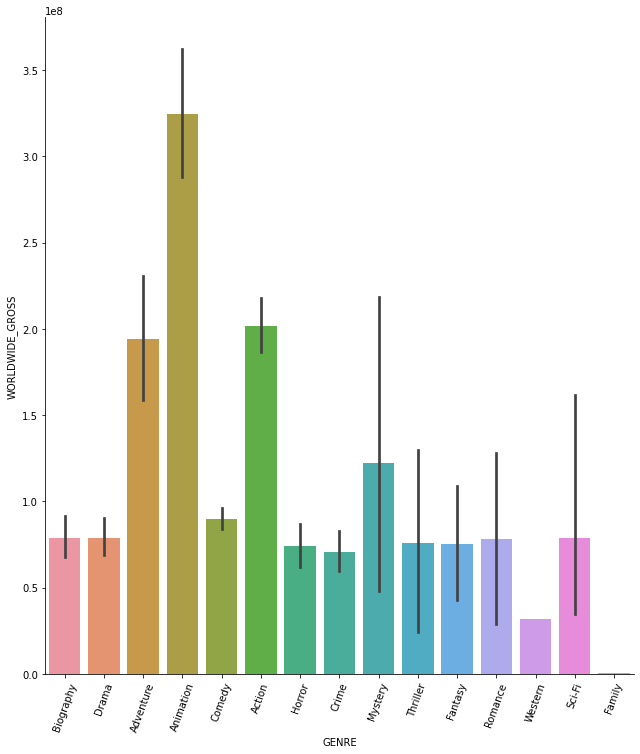

In [33]:
#Film türlerine gore dünya çapında brüt kar*

make_group = dfMatch.groupby('GENRE')[['GENRE','WORLDWIDE_GROSS']].mean().sort_values(by='WORLDWIDE_GROSS',ascending=True).reset_index()
sns.catplot(x='GENRE',y='WORLDWIDE_GROSS',data=dfMatch, kind="bar",height=10,aspect=0.9).set_xticklabels(rotation=1150);

In [34]:
dfMatch.head()

,MOVIE_NAME,YEAR,RUNTIME,IMDB,Critic_Reviews,Meta_Score,GENRE,OPENING_WEEKEND,WORLDWIDE_GROSS,Users_Votes,...,Film_Mean,Top_1000_Users,Top_1000_Voters_Point,US_Users_Point,Non_US_Users_Point,Non_US_Users_Voters,User_Reviews,US_Users_Voters,level_0,BUDGET_New
0,Lovelace,2013.0,1 hour 33 minutes,6.2,241.0,51.0,Biography,184536.0,1585583.0,40032.0,...,6.0,321.0,5.8,6.1,6.1,50.1465,127.0,12.821,425.0,10000000.0
1,Los abrazos rotos,2009.0,2 hours 7 minutes,7.2,241.0,76.0,Drama,107111.0,37472736.0,40035.0,...,7.0,296.0,6.6,7.3,7.2,24.9400,88.0,12.821,425.0,18000000.0
2,The Three Burials of Melquiades Estrada,2005.0,2 hours 1 minute,7.4,241.0,77.0,Adventure,23859.0,12045362.0,40036.0,...,8.0,411.0,7.0,7.4,7.4,22.5870,226.0,12.821,425.0,15000000.0
3,All Dogs Go to Heaven,1989.0,1 hour 24 minutes,6.8,241.0,50.0,Animation,4712834.0,27100027.0,40096.0,...,7.0,371.0,6.3,6.6,6.8,13.9140,112.0,12.821,425.0,13800000.0
4,Saving Silverman,2001.0,1 hour 30 minutes,5.9,241.0,22.0,Comedy,7411852.0,26086706.0,40097.0,...,6.0,334.0,5.2,6.1,5.6,50.1465,218.0,12.821,425.0,22000000.0


In [35]:
#IMDB PUANI VE IMDB PUANI EN DUSUK OLAN FILMLERIN, TURLERI VE DUNYA CAPINDA YAPTIKLARI BRUT KAR.

dfMatch.loc[(dfMatch.Meta_Score==dfMatch.Meta_Score.min()) | (dfMatch.IMDB==dfMatch.IMDB.min())][['GENRE','Meta_Score','IMDB','WORLDWIDE_GROSS']].sort_values(by='WORLDWIDE_GROSS',ascending=False).head(5)


,GENRE,Meta_Score,IMDB,WORLDWIDE_GROSS
2054,Comedy,9.0,2.8,85897593.0
1500,Action,9.0,2.5,29725663.0
304,Action,9.0,2.4,12693645.0
1674,Drama,9.0,3.7,4988181.0
1355,Biography,58.0,1.4,538551.0


In [36]:
dfMatch.describe()

,YEAR,IMDB,Critic_Reviews,Meta_Score,OPENING_WEEKEND,WORLDWIDE_GROSS,Users_Votes,Film_Arithmetic_Mean,Film_Mean,Top_1000_Users,Top_1000_Voters_Point,US_Users_Point,Non_US_Users_Point,Non_US_Users_Voters,User_Reviews,US_Users_Voters,level_0,BUDGET_New
count,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03
mean,2004.679657,6.760587,254.411016,58.345804,1.611605e+07,1.398669e+08,1.674983e+05,6.872512,6.957651,493.676020,6.297792,19.167286,6.686022,75.736291,514.117823,15.039169,424.965705,4.560569e+07
std,10.606602,0.904972,101.964309,17.016889,2.396561e+07,2.121796e+08,1.815683e+05,0.864778,0.990351,157.393172,0.860101,28.741963,0.896503,73.678583,584.047487,9.094317,115.227529,5.224281e+07
min,1970.000000,1.400000,28.000000,9.000000,4.320000e+02,2.100000e+02,4.003200e+04,2.000000,1.000000,24.000000,1.600000,1.000000,1.300000,1.652000,16.000000,1.264000,0.000000,1.000000e+01
25%,1999.000000,6.200000,241.000000,47.000000,1.560299e+06,2.494653e+07,6.013200e+04,6.300000,6.000000,377.000000,5.800000,6.300000,6.200000,31.397000,209.000000,12.821000,425.000000,1.500000e+07
50%,2007.000000,6.800000,241.000000,58.000000,9.851268e+06,6.788495e+07,9.942200e+04,6.900000,7.000000,483.000000,6.400000,7.000000,6.700000,50.146500,339.500000,12.821000,425.000000,3.000000e+07
75%,2013.000000,7.400000,241.000000,71.000000,1.916708e+07,1.641159e+08,1.958370e+05,7.500000,8.000000,601.000000,6.900000,7.900000,7.300000,89.207000,600.000000,12.821000,425.000000,5.800000e+07
max,2020.000000,9.300000,1000.000000,100.000000,3.571150e+08,2.847246e+09,1.352276e+06,9.300000,10.000000,919.000000,8.800000,237.707000,9.000000,548.366000,11190.000000,108.752000,849.000000,8.000000e+08


In [37]:
#Film türlerine göre ortalamalar.

genre1 = dfMatch.groupby("GENRE").mean()
genre1

,YEAR,IMDB,Critic_Reviews,Meta_Score,OPENING_WEEKEND,WORLDWIDE_GROSS,Users_Votes,Film_Arithmetic_Mean,Film_Mean,Top_1000_Users,Top_1000_Voters_Point,US_Users_Point,Non_US_Users_Point,Non_US_Users_Voters,User_Reviews,US_Users_Voters,level_0,BUDGET_New
GENRE,,,,,,,,,,,,,,,,,,
Action,2005.516129,6.539049,274.436333,53.314941,2.461716e+07,2.018665e+08,204019.659593,6.792869,6.877759,534.928693,6.285314,23.667607,6.609762,91.085363,603.653650,15.124675,431.066214,4.736907e+07
Adventure,2002.829787,6.771064,250.319149,58.246809,1.993450e+07,1.938715e+08,178782.719149,6.958723,7.004255,500.225532,6.365106,22.230285,6.757447,79.849172,540.868085,14.824298,428.089362,4.343891e+07
Animation,2006.392070,7.079295,242.088106,65.823789,3.027068e+07,3.244824e+08,189455.704846,7.074009,7.136564,494.524229,6.448018,21.664396,6.884581,81.546894,543.319383,14.680568,421.612335,5.105463e+07
Biography,2007.147826,7.294783,260.800000,67.991304,6.164946e+06,7.900243e+07,161042.165217,7.137826,7.217391,476.856522,6.562609,18.444170,6.975217,72.318670,484.343478,14.723835,436.652174,4.263306e+07
Comedy,2003.651481,6.583827,228.120729,56.334852,1.130280e+07,8.985085e+07,123512.028474,6.749203,6.833713,458.755125,6.113440,12.901560,6.530068,57.422844,384.772210,15.894337,414.835991,4.542561e+07
Crime,2004.007491,7.116854,245.662921,62.677903,8.818362e+06,7.057625e+07,177534.928839,6.984644,7.078652,495.569288,6.461798,21.105629,6.844195,81.409803,563.576779,14.427345,435.262172,4.453377e+07
Drama,2004.556114,7.139698,257.614740,65.169179,7.513175e+06,7.888278e+07,158369.710218,7.043719,7.145729,471.018425,6.410720,18.395968,6.877052,72.920234,484.721943,14.212814,424.222781,4.371769e+07
Family,1971.000000,7.800000,92.000000,67.000000,5.266330e+05,5.663570e+05,191062.000000,7.800000,8.000000,676.000000,7.400000,8.100000,7.500000,57.053000,406.000000,60.311000,425.000000,8.400000e+07
Fantasy,1998.941176,6.241176,249.941176,53.470588,1.467148e+07,7.507554e+07,125890.411765,6.841176,6.882353,503.764706,6.317647,13.028588,6.664706,59.477941,559.235294,14.834765,397.176471,6.600000e+07


In [38]:
import numpy as np

import pandas as pd

from pandas import Series, DataFrame

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [39]:
#View the correlations

cor=dfMatch.corr()
cor

,YEAR,IMDB,Critic_Reviews,Meta_Score,OPENING_WEEKEND,WORLDWIDE_GROSS,Users_Votes,Film_Arithmetic_Mean,Film_Mean,Top_1000_Users,Top_1000_Voters_Point,US_Users_Point,Non_US_Users_Point,Non_US_Users_Voters,User_Reviews,US_Users_Voters,level_0,BUDGET_New
YEAR,1.000000,-0.169622,0.388599,-0.107475,0.194130,0.147765,0.024730,-0.083419,-0.075141,-0.179362,-0.114630,0.015116,-0.080706,0.030825,0.068503,-0.152888,-0.033153,0.017138
IMDB,-0.169622,1.000000,0.108741,0.698133,-0.055017,0.085570,0.428177,0.598042,0.557039,0.325025,0.583116,0.417162,0.601396,0.420301,0.228903,-0.062805,0.198038,0.043401
Critic_Reviews,0.388599,0.108741,1.000000,0.200666,0.389965,0.373887,0.385114,0.128120,0.114946,0.219841,0.176494,0.387234,0.141827,0.388340,0.272974,-0.306842,0.216836,-0.004197
Meta_Score,-0.107475,0.698133,0.200666,1.000000,-0.055586,0.067550,0.303494,0.420222,0.384668,0.261103,0.477687,0.300572,0.436569,0.296910,0.154000,-0.052649,0.153000,0.014068
OPENING_WEEKEND,0.194130,-0.055017,0.389965,-0.055586,1.000000,0.853269,0.450565,0.083051,0.067994,0.369175,0.136726,0.404246,0.086126,0.439421,0.337817,-0.099159,0.185323,0.049549
WORLDWIDE_GROSS,0.147765,0.085570,0.373887,0.067550,0.853269,1.000000,0.579590,0.172841,0.147818,0.465299,0.238720,0.533059,0.178454,0.567170,0.389827,-0.140314,0.249359,0.065176
Users_Votes,0.024730,0.428177,0.385114,0.303494,0.450565,0.579590,1.000000,0.394988,0.357756,0.734711,0.498416,0.937351,0.413401,0.982771,0.622882,-0.197049,0.518660,0.071640
Film_Arithmetic_Mean,-0.083419,0.598042,0.128120,0.420222,0.083051,0.172841,0.394988,1.000000,0.942184,0.270672,0.890881,0.394267,0.981915,0.383427,0.195861,-0.048309,0.165797,0.042911
Film_Mean,-0.075141,0.557039,0.114946,0.384668,0.067994,0.147818,0.357756,0.942184,1.000000,0.229113,0.817681,0.355634,0.922570,0.346416,0.195807,-0.041089,0.150669,0.044400
Top_1000_Users,-0.179362,0.325025,0.219841,0.261103,0.369175,0.465299,0.734711,0.270672,0.229113,1.000000,0.502542,0.689635,0.304923,0.751129,0.459431,0.041729,0.209310,0.163314


In [40]:
lr = LinearRegression()

In [42]:
def linear_regression(x,y): #fonksiyon olarak olusturduk her seferınde yapmamak ıcın. belki lineer reg 5 kere calıstırıcam bi kere yazıp sadece datayı gondererek otomatige bagla.
    
    
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
    model = LinearRegression()
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    mse = np.mean((y_test-predict)**2)
    
    #result = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
    #result.plot(kind='bar',figsize=(16,10))
    

    print("Model score : ", model.score(x_test,y_test))
    print("MSE : ",mse)
    coeff = DataFrame(x_train.columns)
    
    coeff['Coef est'] = Series(model.coef_)
    print(coeff.sort_values(by='Coef est',ascending=False))

In [43]:
x = dfMatch.loc[:,['BUDGET_New','IMDB','Meta_Score','OPENING_WEEKEND',"Film_Arithmetic_Mean","Film_Mean","Critic_Reviews","Users_Votes"]]

y= dfMatch['WORLDWIDE_GROSS']

In [44]:
linear_regression(x,y)

Model score :  0.8486929545154167
MSE :  7280182026274191.0
                      0      Coef est
4  Film_Arithmetic_Mean  8.217134e+06
2            Meta_Score  5.143949e+05
7           Users_Votes  2.872618e+02
3       OPENING_WEEKEND  6.708018e+00
0            BUDGET_New  2.306233e-02
6        Critic_Reviews -4.717124e+04
1                  IMDB -8.743112e+05
5             Film_Mean -7.397994e+06


In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [46]:
y, X = patsy.dmatrices('WORLDWIDE_GROSS ~ YEAR  + IMDB + Critic_Reviews + Meta_Score + GENRE + OPENING_WEEKEND + Users_Votes + Film_Arithmetic_Mean + Film_Mean', data=dfMatch, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        WORLDWIDE_GROSS   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     655.9
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        01:58:42   Log-Likelihood:                -76250.
No. Observations:                3849   AIC:                         1.525e+05
Df Residuals:                    3826   BIC:                         1.527e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.211e+07   3.39e+08      0.065      0.948   -6.43e+08    6.88e+08
GENRE[T.Adventure]    2.745e+07   7.01e+06      3.915      0.000    1.37e+07    4.12e+07
GENRE[T.Animation]    8.653e+07   7.34e+06     11.794      0.000    7.21e+07    1.01e+08
GENRE[T.Biography]    4.202e+06   7.38e+06      0.570      0.569   -1.03e+07    1.87e+07
GENRE[T.Comedy]      -5.054e+06   4.49e+06     -1.124      0.261   -1.39e+07    3.76e+06
GENRE[T.Crime]       -2.454e+07    6.8e+06     -3.609      0.000   -3.79e+07   -1.12e+07
GENRE[T.Drama]       -3.125e+06   5.22e+06     -0.599      0.549   -1.34e+07    7.11e+06
GENRE[T.Family]      -4.763e+07   9.76e+07     -0.488      0.626   -2.39e+08    1.44e+08
GENRE[T.Fantasy]     -4.216e+07   2.39e+07     -1.768      0.077   -8.89e+07     4.6e+06
GENRE[T.Horror]      -3.556e+07   7.66e+06     -4.642      0.000   -5.06e+07   -2.05e+07
GENRE[T.Mystery]     -3.025e+07   2.39e+07     -1.267      0.205   -7.71e+07    1.66e+07
GENRE[T.Romance]     -3.023e+07    6.9e+07     -0.438      0.661   -1.66e+08    1.05e+08
GENRE[T.Sci-Fi]      -4.149e+07   5.63e+07     -0.736      0.462   -1.52e+08     6.9e+07
GENRE[T.Thriller]     -5.16e+07   4.88e+07     -1.056      0.291   -1.47e+08    4.42e+07
GENRE[T.Western]     -4.165e+07   9.76e+07     -0.427      0.670   -2.33e+08     1.5e+08
YEAR                 -2.067e+04   1.69e+05     -0.122      0.903   -3.52e+05     3.1e+05
IMDB                 -2.726e+06   2.96e+06     -0.920      0.357   -8.53e+06    3.08e+06
Critic_Reviews       -1.165e+04   1.95e+04     -0.598      0.550   -4.99e+04    2.66e+04
Meta_Score            3.672e+05   1.34e+05      2.739      0.006    1.04e+05     6.3e+05
OPENING_WEEKEND          6.4324      0.084     77.024      0.000       6.269       6.596
Users_Votes            283.7203     11.788     24.068      0.000     260.608     306.833
Film_Arithmetic_Mean  4.994e+06   5.68e+06      0.880      0.379   -6.13e+06    1.61e+07
Film_Mean                -4e+06   4.75e+06     -0.842      0.400   -1.33e+07    5.31e+06
==============================================================================
Omnibus:                     4360.308   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1300058.258
Skew:                           5.356   Prob(JB):                         0.00
Kurtosis:                      92.396   Cond. No.                     6.24e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#analiz kısmında object türünde olan verilerden yararlanamadıgımız için bunları çıkartıyoruz.
#dfMatch_copy[genre] adında yeni bir kolon olusturduk filmlerin türlerini dummy olarak atayacagız
dfMatch_copy = dfMatch.select_dtypes(exclude=['object']).copy()
dfMatch_copy['GENRE'] = dfMatch['GENRE']
dfMatch_copy= pd.get_dummies(dfMatch_copy,columns=['GENRE'])
dfMatch_copy.corr()['WORLDWIDE_GROSS'].sort_values(ascending=False)

WORLDWIDE_GROSS          1.000000
OPENING_WEEKEND          0.853269
Users_Votes              0.579590
Non_US_Users_Voters      0.567170
US_Users_Point           0.533059
Top_1000_Users           0.465299
User_Reviews             0.389827
Critic_Reviews           0.373887
level_0                  0.249359
Top_1000_Voters_Point    0.238720
GENRE_Animation          0.217851
GENRE_Action             0.194079
Non_US_Users_Point       0.178454
Film_Arithmetic_Mean     0.172841
Film_Mean                0.147818
YEAR                     0.147765
IMDB                     0.085570
Meta_Score               0.067550
BUDGET_New               0.065176
GENRE_Adventure          0.064912
GENRE_Mystery           -0.005628
GENRE_Romance           -0.006616
GENRE_Sci-Fi            -0.008020
GENRE_Western           -0.008212
GENRE_Thriller          -0.009716
GENRE_Family            -0.010585
GENRE_Fantasy           -0.020341
GENRE_Horror            -0.070869
GENRE_Biography         -0.072325
GENRE_Crime   

In [67]:
dfcor_with_dummy = dfMatch_copy.corr()
dfcor_with_dummy

,YEAR,IMDB,Critic_Reviews,Meta_Score,OPENING_WEEKEND,WORLDWIDE_GROSS,Users_Votes,Film_Arithmetic_Mean,Film_Mean,Top_1000_Users,...,GENRE_Drama,GENRE_Family,GENRE_Fantasy,GENRE_Horror,GENRE_Mystery,GENRE_Romance,GENRE_Sci-Fi,GENRE_Thriller,GENRE_Western,log_WORLDWIDE_GROSS
YEAR,1.000000,-0.169622,0.388599,-0.107475,0.194130,0.147765,0.024730,-0.083419,-0.075141,-0.179362,...,-0.004991,-0.051195,-0.036040,-0.017160,-0.009071,-0.015436,0.009622,-0.008150,-0.043595,0.119571
IMDB,-0.169622,1.000000,0.108741,0.698133,-0.055017,0.085570,0.428177,0.598042,0.557039,0.325025,...,0.179515,0.018518,-0.038233,-0.138527,0.040139,0.006033,0.002245,-0.010180,0.018518,-0.085815
Critic_Reviews,0.388599,0.108741,1.000000,0.200666,0.389965,0.373887,0.385114,0.128120,0.114946,0.219841,...,0.013464,-0.025681,-0.002920,0.023717,0.003190,0.018023,0.014133,0.002559,-0.002121,0.200731
Meta_Score,-0.107475,0.698133,0.200666,1.000000,-0.055586,0.067550,0.303494,0.420222,0.384668,0.261103,...,0.171825,0.008199,-0.019085,-0.095067,-0.006650,0.008917,-0.003851,0.005031,0.010094,-0.095498
OPENING_WEEKEND,0.194130,-0.055017,0.389965,-0.055586,1.000000,0.853269,0.450565,0.083051,0.067994,0.369175,...,-0.153824,-0.010488,-0.004015,-0.020868,-0.004882,-0.003902,-0.009031,0.000395,-0.004215,0.546275
WORLDWIDE_GROSS,0.147765,0.085570,0.373887,0.067550,0.853269,1.000000,0.579590,0.172841,0.147818,0.465299,...,-0.123163,-0.010585,-0.020341,-0.070869,-0.005628,-0.006616,-0.008020,-0.009716,-0.008212,0.639017
Users_Votes,0.024730,0.428177,0.385114,0.303494,0.450565,0.579590,1.000000,0.394988,0.357756,0.734711,...,-0.021544,0.002092,-0.015265,-0.057665,0.035526,-0.002410,0.018065,-0.008475,-0.008586,0.434476
Film_Arithmetic_Mean,-0.083419,0.598042,0.128120,0.420222,0.083051,0.172841,0.394988,1.000000,0.942184,0.270672,...,0.084837,0.017292,-0.002414,-0.088363,0.035195,0.016547,0.003041,-0.035344,0.019156,0.059371
Film_Mean,-0.075141,0.557039,0.114946,0.384668,0.067994,0.147818,0.357756,0.942184,1.000000,0.229113,...,0.081380,0.016969,-0.005065,-0.074564,0.042415,0.012488,0.001194,-0.031193,0.016969,0.048677
Top_1000_Users,-0.179362,0.325025,0.219841,0.261103,0.369175,0.465299,0.734711,0.270672,0.229113,1.000000,...,-0.061687,0.018677,0.004270,-0.029179,0.010494,0.005263,0.014019,-0.004391,0.007306,0.454772


In [68]:
ilk_cor = dfcor_with_dummy.iloc[0:17,0:17]
ilk_cor


,YEAR,IMDB,Critic_Reviews,Meta_Score,OPENING_WEEKEND,WORLDWIDE_GROSS,Users_Votes,Film_Arithmetic_Mean,Film_Mean,Top_1000_Users,Top_1000_Voters_Point,US_Users_Point,Non_US_Users_Point,Non_US_Users_Voters,User_Reviews,US_Users_Voters,level_0
YEAR,1.000000,-0.169622,0.388599,-0.107475,0.194130,0.147765,0.024730,-0.083419,-0.075141,-0.179362,-0.114630,0.015116,-0.080706,0.030825,0.068503,-0.152888,-0.033153
IMDB,-0.169622,1.000000,0.108741,0.698133,-0.055017,0.085570,0.428177,0.598042,0.557039,0.325025,0.583116,0.417162,0.601396,0.420301,0.228903,-0.062805,0.198038
Critic_Reviews,0.388599,0.108741,1.000000,0.200666,0.389965,0.373887,0.385114,0.128120,0.114946,0.219841,0.176494,0.387234,0.141827,0.388340,0.272974,-0.306842,0.216836
Meta_Score,-0.107475,0.698133,0.200666,1.000000,-0.055586,0.067550,0.303494,0.420222,0.384668,0.261103,0.477687,0.300572,0.436569,0.296910,0.154000,-0.052649,0.153000
OPENING_WEEKEND,0.194130,-0.055017,0.389965,-0.055586,1.000000,0.853269,0.450565,0.083051,0.067994,0.369175,0.136726,0.404246,0.086126,0.439421,0.337817,-0.099159,0.185323
WORLDWIDE_GROSS,0.147765,0.085570,0.373887,0.067550,0.853269,1.000000,0.579590,0.172841,0.147818,0.465299,0.238720,0.533059,0.178454,0.567170,0.389827,-0.140314,0.249359
Users_Votes,0.024730,0.428177,0.385114,0.303494,0.450565,0.579590,1.000000,0.394988,0.357756,0.734711,0.498416,0.937351,0.413401,0.982771,0.622882,-0.197049,0.518660
Film_Arithmetic_Mean,-0.083419,0.598042,0.128120,0.420222,0.083051,0.172841,0.394988,1.000000,0.942184,0.270672,0.890881,0.394267,0.981915,0.383427,0.195861,-0.048309,0.165797
Film_Mean,-0.075141,0.557039,0.114946,0.384668,0.067994,0.147818,0.357756,0.942184,1.000000,0.229113,0.817681,0.355634,0.922570,0.346416,0.195807,-0.041089,0.150669
Top_1000_Users,-0.179362,0.325025,0.219841,0.261103,0.369175,0.465299,0.734711,0.270672,0.229113,1.000000,0.502542,0.689635,0.304923,0.751129,0.459431,0.041729,0.209310


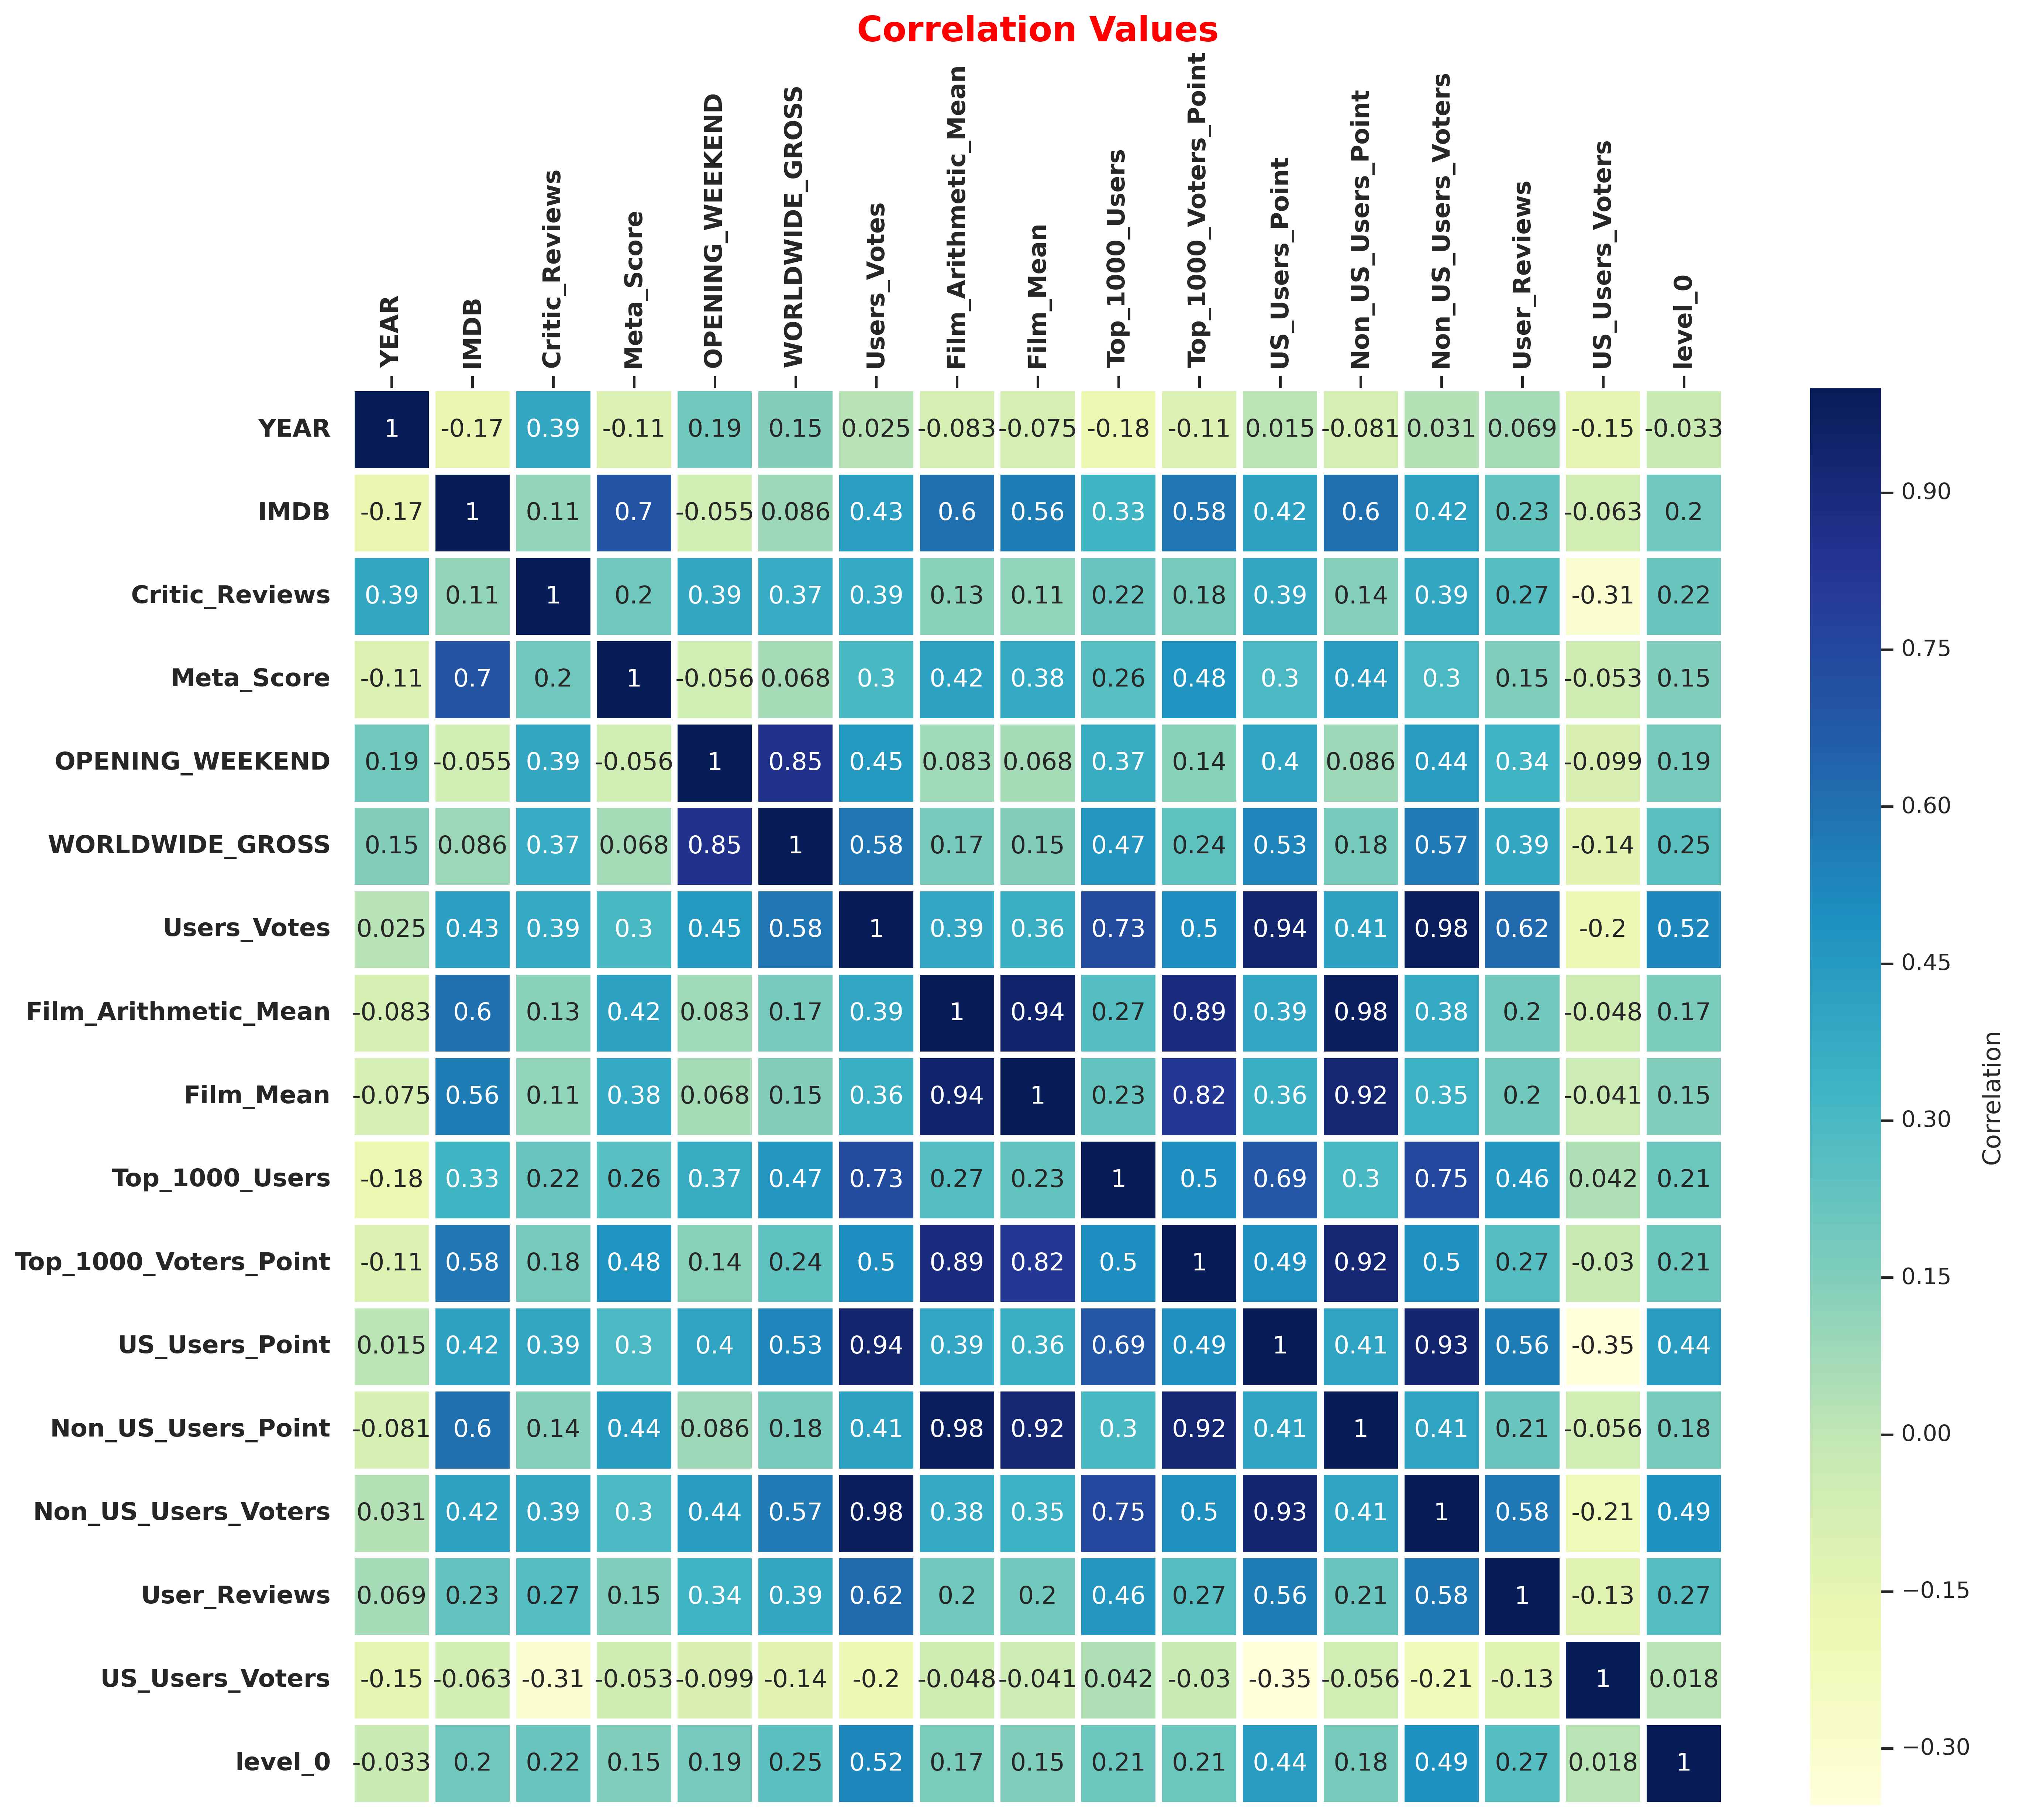

In [76]:
plt.figure(figsize=(15,12),dpi=400),
sns.set(font_scale=1)


sns.heatmap(ilk_cor,annot=True,fmt=".2g" , annot_kws={'size':12} ,  lw=3,cmap="YlGnBu",cbar_kws={'label': 'Correlation',})



plt.style.use('classic')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=90, size=12)
plt.gca().xaxis.tick_top(), plt.xticks(rotation=90,weight="bold",fontsize =12), plt.yticks(rotation=0)
plt.title("Correlation Values",weight="bold",c="red", fontsize=17)

plt.show()

In [93]:
son_cor = dfcor_with_dummy.iloc[18:33,1:17]
son_cor.drop('level_0', 1, inplace=True)
son_cor

,IMDB,Critic_Reviews,Meta_Score,OPENING_WEEKEND,WORLDWIDE_GROSS,Users_Votes,Film_Arithmetic_Mean,Film_Mean,Top_1000_Users,Top_1000_Voters_Point,US_Users_Point,Non_US_Users_Point,Non_US_Users_Voters,User_Reviews,US_Users_Voters
GENRE_Action,-0.162594,0.130444,-0.196361,0.235602,0.194079,0.133598,-0.061170,-0.053581,0.174084,-0.009635,0.103997,-0.056499,0.138367,0.101822,0.006245
GENRE_Adventure,0.002952,-0.010235,-0.001484,0.040634,0.064912,0.015850,0.025425,0.012001,0.010613,0.019960,0.027179,0.020318,0.014236,0.011681,-0.006026
GENRE_Animation,0.088177,-0.030259,0.110027,0.147879,0.217851,0.030279,0.058339,0.045232,0.001349,0.043731,0.021753,0.055454,0.019746,0.012519,-0.009873
GENRE_Biography,0.148830,0.015798,0.142913,-0.104691,-0.072325,-0.008965,0.077354,0.066127,-0.026943,0.077629,-0.006343,0.081333,-0.011695,-0.012853,-0.008742
GENRE_Comedy,-0.106195,-0.140184,-0.064250,-0.109195,-0.128162,-0.131713,-0.077526,-0.068041,-0.120629,-0.116533,-0.118524,-0.094579,-0.135139,-0.120408,0.051125
GENRE_Crime,0.107495,-0.023427,0.069513,-0.083147,-0.089170,0.015094,0.035406,0.033362,0.003285,0.052067,0.018415,0.048176,0.021026,0.023123,-0.018370
GENRE_Drama,0.179515,0.013464,0.171825,-0.153824,-0.123163,-0.021544,0.084837,0.081380,-0.061687,0.056263,-0.011500,0.091310,-0.016378,-0.021568,-0.038937
GENRE_Family,0.018518,-0.025681,0.008199,-0.010488,-0.010585,0.002092,0.017292,0.016969,0.018677,0.020661,-0.006208,0.014639,-0.004088,-0.002985,0.080260
GENRE_Fantasy,-0.038233,-0.002920,-0.019085,-0.004015,-0.020341,-0.015265,-0.002414,-0.005065,0.004270,0.001538,-0.014227,-0.001584,-0.014700,0.005146,-0.001497
GENRE_Horror,-0.138527,0.023717,-0.095067,-0.020868,-0.070869,-0.057665,-0.088363,-0.074564,-0.029179,-0.074486,-0.050122,-0.087491,-0.061364,0.003191,0.005827


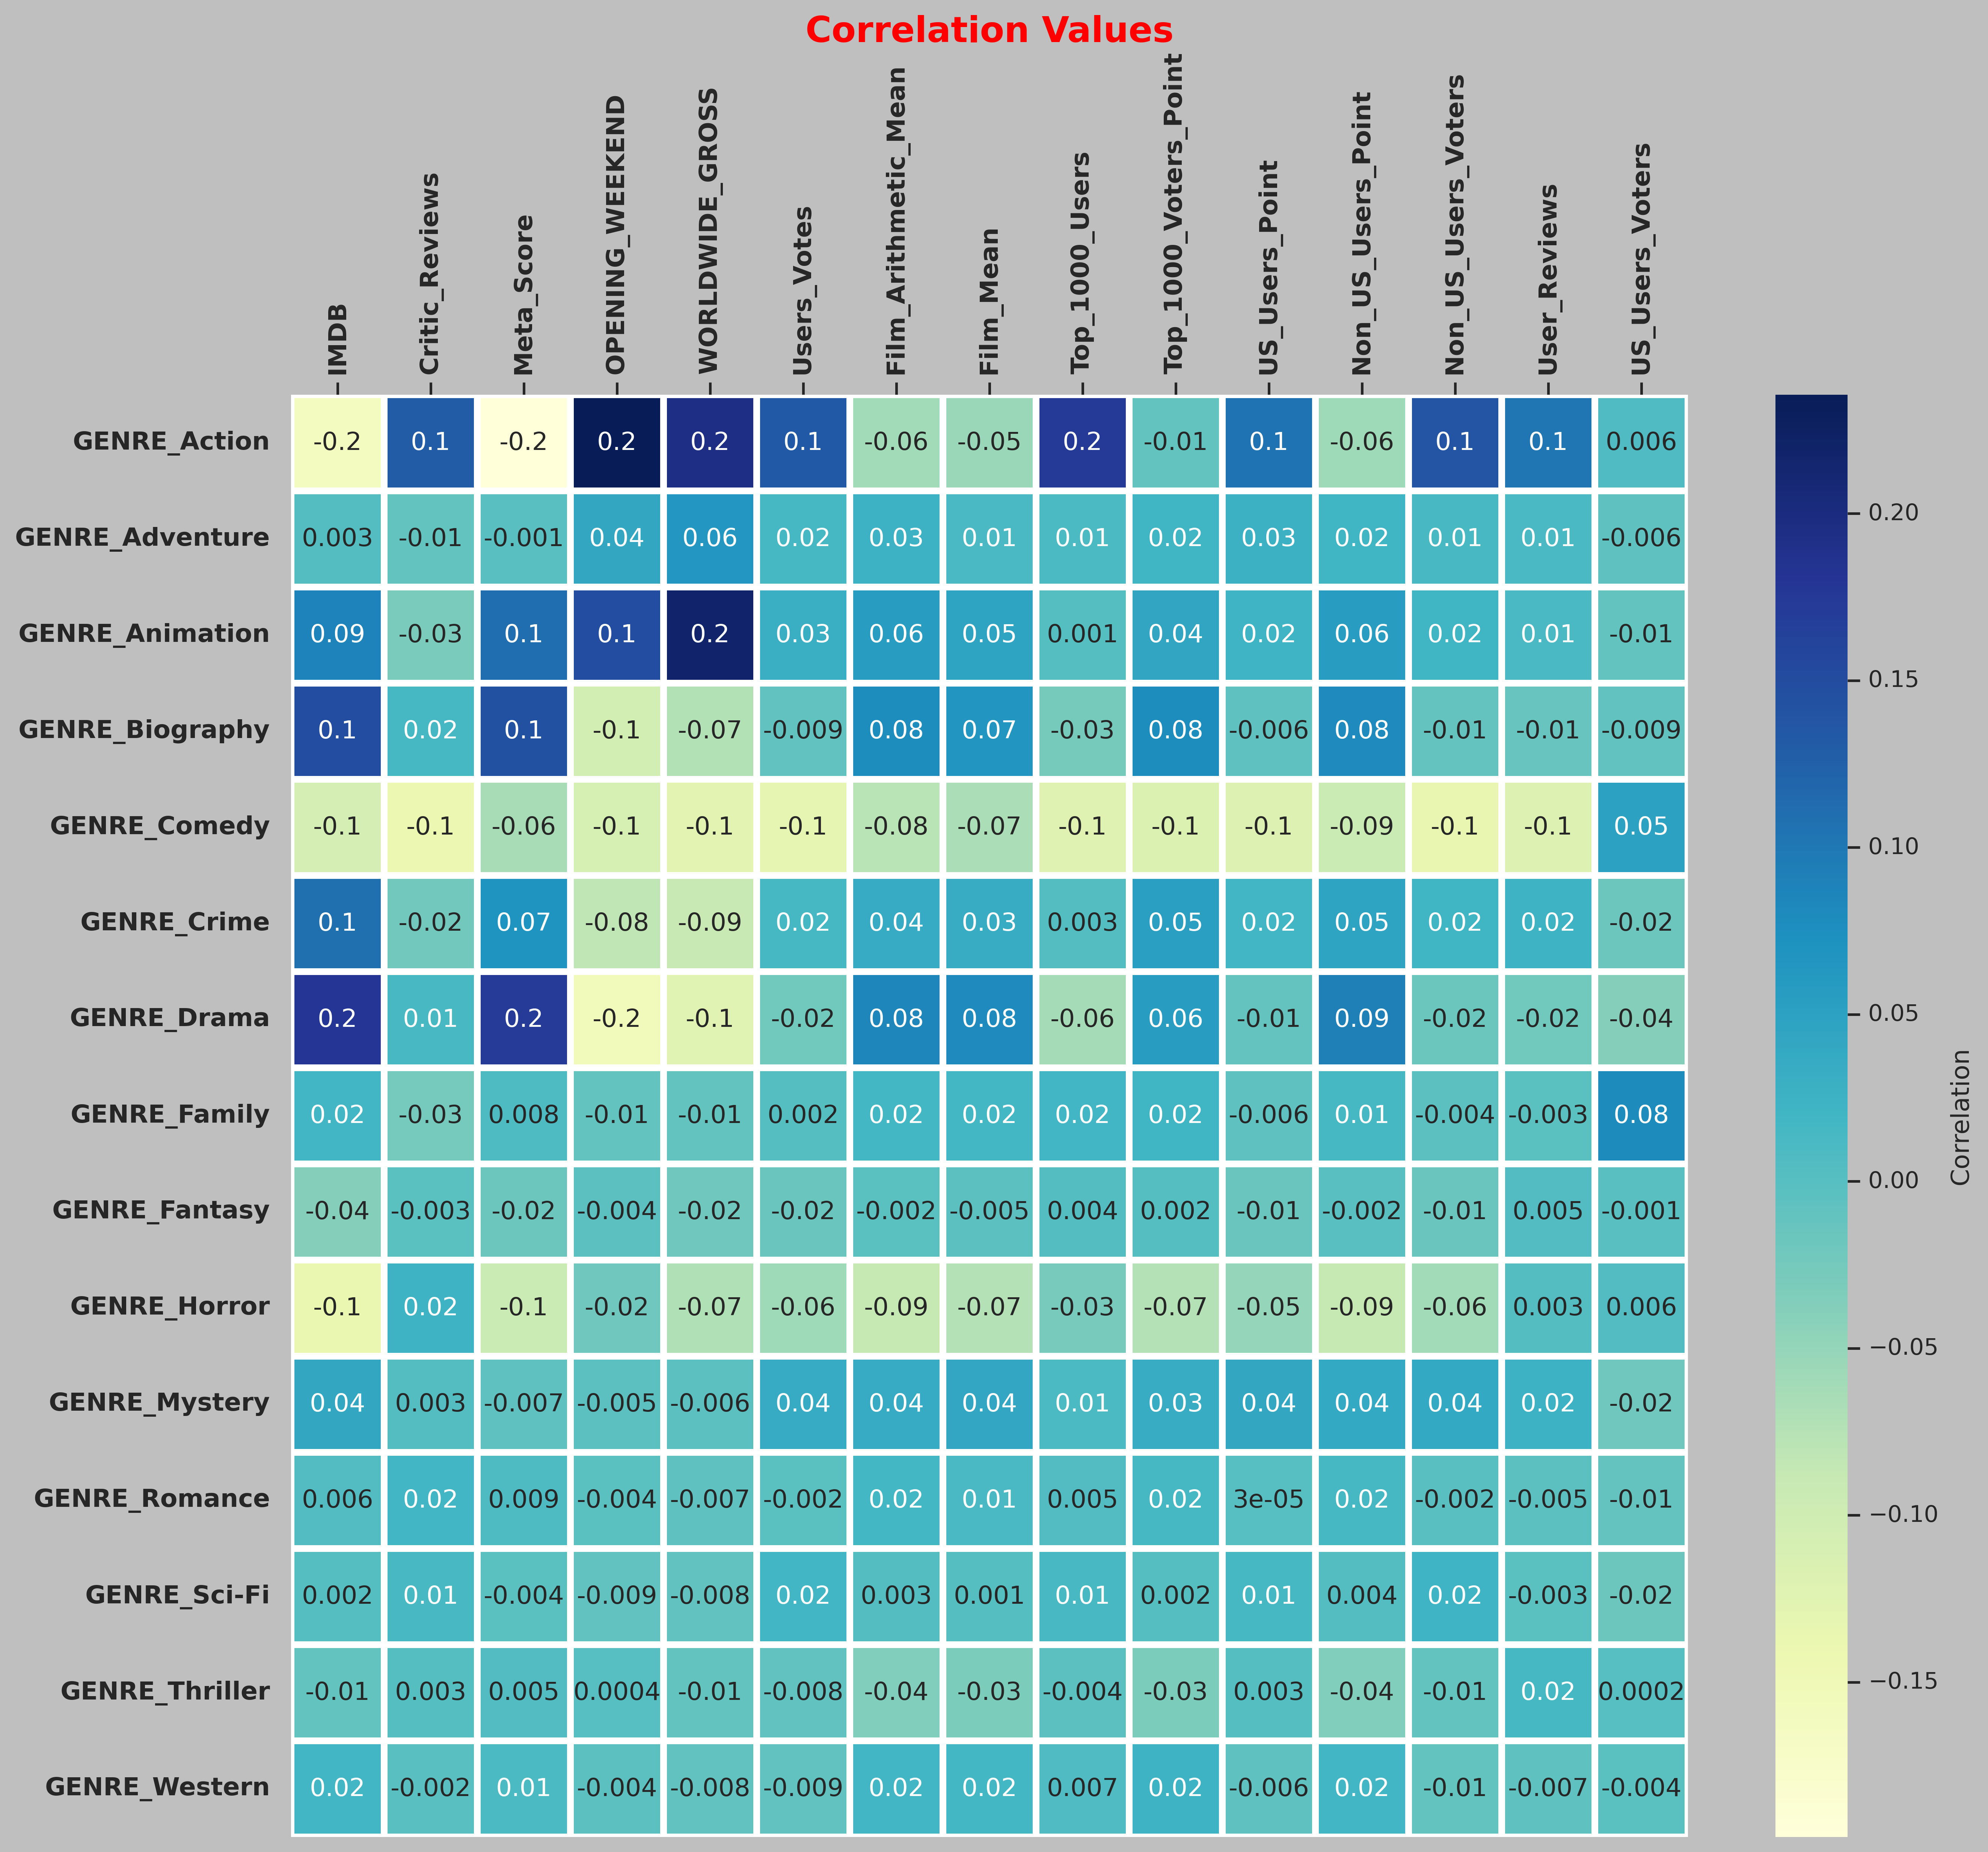

In [94]:
plt.figure(figsize=(15,12),dpi=400),
sns.set(font_scale=1)


sns.heatmap(son_cor,annot=True,fmt=".1g" , annot_kws={'size':12} ,  lw=3,cmap="YlGnBu",cbar_kws={'label': 'Correlation'})



plt.style.use('classic')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=90, size=12)
plt.gca().xaxis.tick_top(), plt.xticks(rotation=90,weight="bold",fontsize =12), plt.yticks(rotation=0)
plt.title("Correlation Values",weight="bold",c="red", fontsize=17)

plt.show()

In [72]:
#bu sekilde calistirinca model score ve mse degisti cunku make kolonu eklenmis oldu türlere gore de coef degerını gorebiliryoruz.
#model score yükseldi
#x'in ne oldugunu yukarda sectik ;x = dfMatch.loc[:,['NEWBDGT','IMDB','METASCORE','OPENING_WEEKEND']]



x,y = dfMatch_copy.drop('WORLDWIDE_GROSS',axis=1) , dfMatch_copy['WORLDWIDE_GROSS']  
linear_regression(x,y)

Model score :  0.8752708745001638
MSE :  6001377759433720.0
                        0      Coef est
24           GENRE_Family  1.029298e+08
19        GENRE_Animation  7.425248e+07
18        GENRE_Adventure  2.907974e+07
32    log_WORLDWIDE_GROSS  2.668148e+07
11     Non_US_Users_Point  7.825764e+06
1                    IMDB  7.714951e+06
27          GENRE_Mystery  6.285716e+06
23            GENRE_Drama  5.967840e+06
17           GENRE_Action  5.513178e+06
9   Top_1000_Voters_Point  4.695747e+06
3              Meta_Score  4.834869e+05
10         US_Users_Point  2.144561e+05
15                level_0  3.108333e+04
5             Users_Votes  2.059881e+02
4         OPENING_WEEKEND  5.760558e+00
31          GENRE_Western  0.000000e+00
16             BUDGET_New -8.296309e-03
13           User_Reviews -6.058773e+03
2          Critic_Reviews -1.046155e+04
8          Top_1000_Users -2.970763e+04
12    Non_US_Users_Voters -7.134356e+04
0                    YEAR -1.194276e+05
20        GENRE_Biog

In [108]:
dfMatch_copy['log_WORLDWIDE_GROSS'] = np.log(dfMatch_copy.WORLDWIDE_GROSS)

y = dfMatch_copy['log_WORLDWIDE_GROSS']
x = dfMatch_copy.loc[:,['GENRE_Animation','IMDB','GENRE_Adventure','GENRE_Action','OPENING_WEEKEND','BUDGET_New',"Film_Arithmetic_Mean",
                   "Top_1000_Voters_Point","Users_Votes","Top_1000_Users",'GENRE_Family','Meta_Score','GENRE_Comedy','GENRE_Thriller','GENRE_Horror',
                    "GENRE_Biography","GENRE_Drama","Non_US_Users_Voters","User_Reviews","US_Users_Point","Critic_Reviews",
                    "YEAR","US_Users_Voters","GENRE_Romance","GENRE_Sci-Fi","Non_US_Users_Point","GENRE_Fantasy","Film_Mean"
                    
                       
                       
                       ]]

linear_regression(x,y)

Model score :  0.4078752302577727
MSE :  1.8597134309418024
                        0      Coef est
6    Film_Arithmetic_Mean  1.079052e+00
0         GENRE_Animation  1.035457e+00
23          GENRE_Romance  8.119316e-01
13         GENRE_Thriller  5.962108e-01
15        GENRE_Biography  5.478103e-01
2         GENRE_Adventure  4.021780e-01
3            GENRE_Action  2.673394e-01
12           GENRE_Comedy  2.544433e-01
16            GENRE_Drama  1.012271e-01
27              Film_Mean  4.199392e-02
21                   YEAR  1.279404e-02
24           GENRE_Sci-Fi  1.118657e-02
9          Top_1000_Users  3.862136e-03
17    Non_US_Users_Voters  1.815920e-03
18           User_Reviews  2.225357e-05
8             Users_Votes  2.641464e-06
4         OPENING_WEEKEND  2.316214e-08
5              BUDGET_New  6.944781e-10
20         Critic_Reviews -9.250923e-04
22        US_Users_Voters -5.044284e-03
11             Meta_Score -5.675910e-03
19         US_Users_Point -1.262123e-02
7   Top_1000_Voters_

In [133]:
dfMatch_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3849 entries, 0 to 3848
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   3849 non-null   float64
 1   IMDB                   3849 non-null   float64
 2   Critic_Reviews         3849 non-null   float64
 3   Meta_Score             3849 non-null   float64
 4   OPENING_WEEKEND        3849 non-null   float64
 5   WORLDWIDE_GROSS        3849 non-null   float64
 6   Users_Votes            3849 non-null   float64
 7   Film_Arithmetic_Mean   3849 non-null   float64
 8   Film_Mean              3849 non-null   float64
 9   Top_1000_Users         3849 non-null   float64
 10  Top_1000_Voters_Point  3849 non-null   float64
 11  US_Users_Point         3849 non-null   float64
 12  Non_US_Users_Point     3849 non-null   float64
 13  Non_US_Users_Voters    3849 non-null   float64
 14  User_Reviews           3849 non-null   float64
 15  US_U

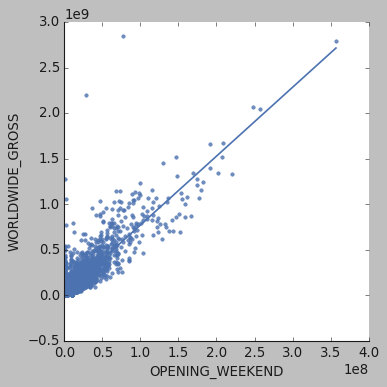

In [173]:
sns.lmplot(x="OPENING_WEEKEND", y="WORLDWIDE_GROSS", data=dfMatch_copy,
           ci=None, scatter_kws={"s": 10});

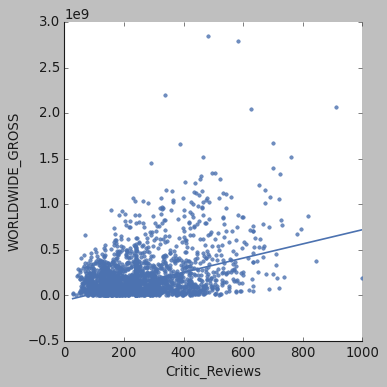

In [158]:
sns.lmplot(x="Critic_Reviews", y="WORLDWIDE_GROSS", data=dfMatch_copy,
           ci=None, scatter_kws={"s": 10});

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X, y = dfMatch_copy.drop('WORLDWIDE_GROSS',axis=1), dfMatch_copy['WORLDWIDE_GROSS']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [161]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [162]:
lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [163]:

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.829
Ridge Regression val R^2: 0.829
Degree 2 polynomial regression val R^2: 0.878


In [164]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.875


In [165]:
#TRAIN, VALIDATION, TEST SURECINI TAMAMLADIKTAN SONRA CROSS-VALIDATION KISMINA GECIYORUZ.

In [166]:


from sklearn.model_selection import KFold

X, y = dfMatch_copy.drop('WORLDWIDE_GROSS',axis=1), dfMatch_copy['WORLDWIDE_GROSS']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)
X

array([[2007.        ,    4.1       ,  241.        , ...,    0.        ,
           0.        ,   18.88952426],
       [2010.        ,    5.        ,  241.        , ...,    0.        ,
           0.        ,   18.53813046],
       [2011.        ,    6.5       ,  396.        , ...,    0.        ,
           0.        ,   20.19013377],
       ...,
       [2014.        ,    8.1       ,  241.        , ...,    0.        ,
           0.        ,   15.20647027],
       [2002.        ,    6.7       ,  233.        , ...,    0.        ,
           0.        ,   18.45009256],
       [1993.        ,    7.8       ,  241.        , ...,    0.        ,
           0.        ,   16.9612956 ]])

In [167]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.780460184192444, 0.8754529224906672, 0.6931118534087604, 0.8365646350711411, 0.7867327416066945]
Ridge scores:  [0.7803967489095238, 0.8756279049320486, 0.6931473348236634, 0.8366802034588181, 0.7867353013639325] 

Simple mean cv r^2: 0.794 +- 0.061
Ridge mean cv r^2: 0.795 +- 0.061


In [168]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.875


In [169]:
#K-FOLD FARKLI BİR YAPIM SEKLI-CROSS-VALIDATION FARKLI YAPIM SEKILLERI.

In [170]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm,X,y, cv=5, scoring='r2')
print(np.mean(cross_val_score(lm,X,y, cv=5, scoring='r2')))

0.7976643795114874


In [171]:
kf = KFold(n_splits=5, shuffle=True, random_state=71)
cross_val_score(lm,X,y, cv=kf, scoring='r2')
print(np.mean(cross_val_score(lm,X,y, cv=kf, scoring='r2')))

0.7944644673539415


In [64]:
# Lasso regresyonu

#LASSO((Least Absolute Shrinkage Selector Operator))En Az Mutlak Büzülme Seçici Operatörü), ridge'e oldukça benzer.

In [65]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=1, normalize=True)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X)

#calculating mse

mse = np.mean((pred - y)**2)

mse

lassoReg.score(X,y)

G:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5702935789142016e+16, tolerance: 1.0962315819232124e+16
  model = cd_fast.enet_coordinate_descent(


0.7976927025092743

In [66]:
dfMatch.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3849 entries, 0 to 3848
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MOVIE_NAME             3849 non-null   object 
 1   YEAR                   3849 non-null   float64
 2   RUNTIME                3849 non-null   object 
 3   IMDB                   3849 non-null   float64
 4   Critic_Reviews         3849 non-null   float64
 5   Meta_Score             3849 non-null   float64
 6   GENRE                  3849 non-null   object 
 7   OPENING_WEEKEND        3849 non-null   float64
 8   WORLDWIDE_GROSS        3849 non-null   float64
 9   Users_Votes            3849 non-null   float64
 10  Film_Arithmetic_Mean   3849 non-null   float64
 11  Film_Mean              3849 non-null   float64
 12  Top_1000_Users         3849 non-null   float64
 13  Top_1000_Voters_Point  3849 non-null   float64
 14  US_Users_Point         3849 non-null   float64
 15  Non_